In [2]:
## Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_notebook, show
from bokeh.layouts import gridplot
import math
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

In [3]:
## Initializations for bokeh
output_notebook()

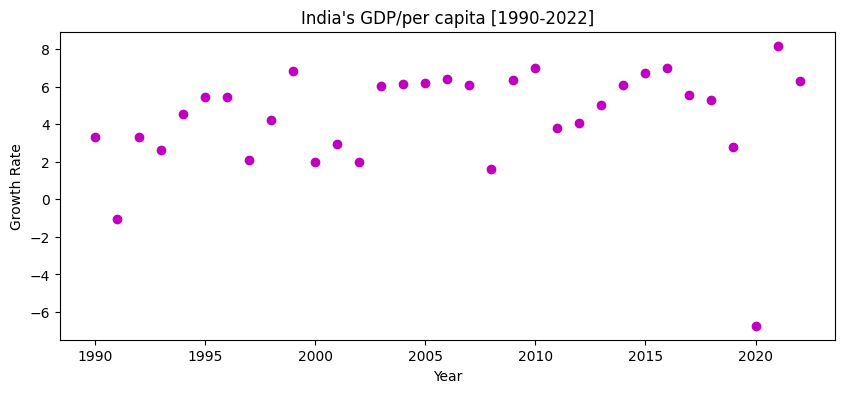

In [4]:
## Import data
gdp_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/gdp_pcapita.csv", index_col = 'year', parse_dates = True)
# Scatter plot of GDP per capita growth rate
plt.figure(figsize=(10, 4))
plt.title("India's GDP/per capita [1990-2022]")
plt.xlabel("Year")
plt.ylabel("Growth Rate")
plt.scatter(gdp_data['yr'], gdp_data['growth_rate'], marker='o', color='m', label='Data Points')

In [5]:
## Figure for GDP per capita growth rate
p1 = figure(title="India's GDP/per capita [1990-2022]", x_axis_label="Year", y_axis_label="Growth Rate")
p1.line(gdp_data['yr'], gdp_data['growth_rate'], legend_label="rate", line_width=3, line_color=(172, 51, 255))
p1.legend.location = "top_left"
p1.width = 500
p1.height = 300

## Figure for absolute GDP/per capita in dollars
p2 = figure(title="India's GDP/per capita [1990-2022]", x_axis_label="Year", y_axis_label="GDP in $")
p2.line(gdp_data['yr'], gdp_data['current_gdp'], legend_label="GDP", line_width=3, line_color=(255, 125, 51))
p2.legend.location = "top_left"
p2.width = 500
p2.height = 300

# Create a grid of plots
grid = gridplot([[p1, p2]])
# Show the grid of plots
show(grid)

# Stationarity check

In [6]:
## Delete yr column
df_rate = gdp_data.drop(['yr','current_gdp'], axis=1)

In [7]:
## Import modules
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

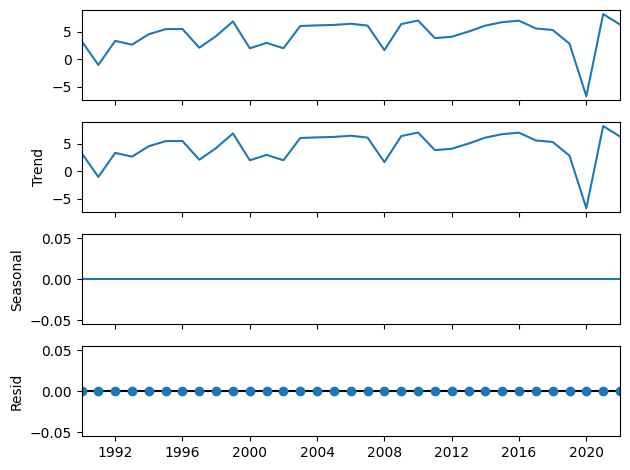

In [8]:
decomposition = sm.tsa.seasonal_decompose(df_rate, model='additive')
fig = decomposition.plot()
plt.show()

In [9]:
## AD Fuller test
adftest = adfuller(df_rate['growth_rate'])
print("P-value [AD Fuller Test]", adftest[1])
## P-value is less than 0.05(LoS), hence the data is stationary

P-value [AD Fuller Test] 9.076864056596722e-06


# ARIMA Model

In [10]:
## Split dataset into train and test sets

In [11]:
df_rate_train = df_rate[:27]
df_rate_test = df_rate[27:]

In [12]:
## Determine p , d, q parameters for ARIMA model

In [13]:
import itertools
from sklearn.metrics import mean_squared_error

In [14]:
p = range(0, 8)
q = range(0, 8)
d = range(0, 2)

In [15]:
pdq_com = list(itertools.product(p,d,q))

In [16]:
rmse = []
order1 = []
for pdq in pdq_com:
  try:
    model = sm.tsa.ARIMA(df_rate_train, order=pdq).fit()
    pred = model.predict(start=len(df_rate_train), end=len(df_rate)-1)
    error = np.sqrt(mean_squared_error(df_rate_test, pred))
    order1.append(pdq)
    rmse.append(error)
  except:
    continue

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be use

In [17]:
result = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])

In [18]:
result.to_csv("arima_result.csv")

In [19]:
min_index = result['RMSE'].idxmin()
print(min_index)

(4, 0, 4)


In [20]:
df_rate_train.head()

,growth_rate
year,
1990-01-01,3.30
1991-01-01,-1.05
1992-01-01,3.32
1993-01-01,2.63
1994-01-01,4.53


In [ ]:
## ARIMA with (4, 0, 4) p, d, q paramater

In [ ]:
model = sm.tsa.ARIMA(df_rate_train, order=(4, 0, 4)).fit()

In [ ]:
predict = model.predict(start=len(df_rate_train), end=len(df_rate)-1)
print(predict)

2017-01-01    4.335859
2018-01-01    4.625773
2019-01-01    3.603547
2020-01-01    3.194064
2021-01-01    4.143658
2022-01-01    4.055678
Freq: AS-JAN, Name: predicted_mean, dtype: float64


In [ ]:
error = np.sqrt(mean_squared_error(df_rate_test, predict))
print("RMSE-ARIMA =", error)

RMSE-ARIMA = 4.515420146332105


In [ ]:
print(df_rate['growth_rate'].mean(), np.sqrt(df_rate['growth_rate'].var()))

4.3530303030303035 2.845503563572365


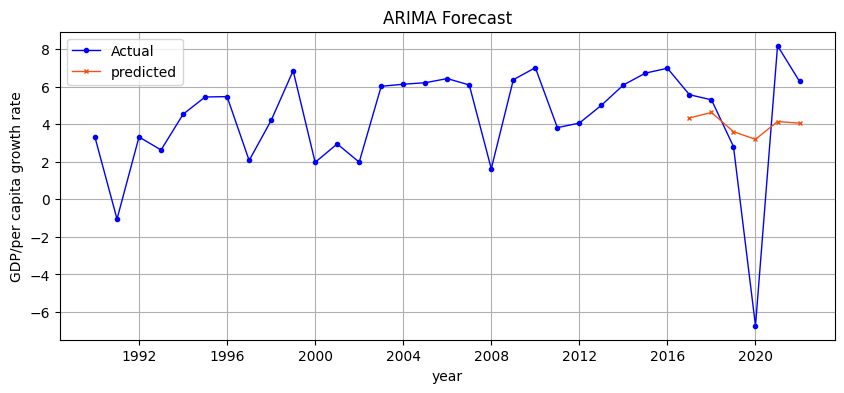

In [ ]:
## Plot ARIM predictions
plt.figure(figsize=(10, 4))
plt.plot(gdp_data['growth_rate'],label='Actual', color='blue', linewidth=1, marker='o', markersize=3)
plt.plot(predict, label='predicted', c='#F45311', linewidth=1, marker='x', markersize=3)
plt.xlabel("year")
plt.ylabel("GDP/per capita growth rate")
plt.legend()
plt.grid()
plt.title("ARIMA Forecast")
plt.show()

# Support Vector Regressor(SVR)

In [ ]:
gdp_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/gdp_pcapita.csv", parse_dates = True)
gdp_data = gdp_data.loc[:, ['year','growth_rate']]
gdp_data.head()

,year,growth_rate
0,1990,3.30
1,1991,-1.05
2,1992,3.32
3,1993,2.63
4,1994,4.53


In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

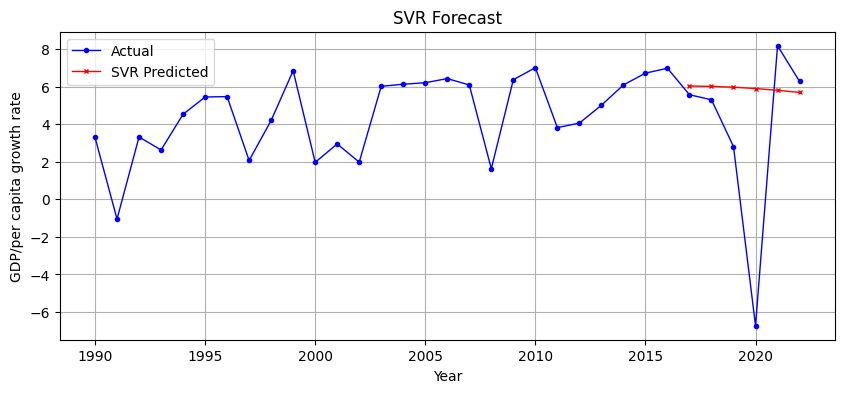

In [ ]:
# Split the data into training and test sets
train_data = gdp_data.iloc[:27]
test_data = gdp_data.iloc[27:]

# Separate features (years) and target (current_gdp)
X_train = train_data['year'].values.reshape(-1, 1)
y_train = train_data['growth_rate'].values
X_test = test_data['year'].values.reshape(-1, 1)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the SVR model
svr = SVR(kernel='rbf') # Other kernel options: 'linear', 'rbf', 'poly', 'sigmoid'
svr.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svr.predict(X_test_scaled)

# Visualize the results
plt.figure(figsize=(10, 4))
plt.plot(gdp_data['year'], gdp_data['growth_rate'], label='Actual', linewidth=1, color='blue', marker='o', markersize=3)
plt.plot(test_data['year'], y_pred, label='SVR Predicted', color='red', linewidth=1, marker='x', markersize=3)
plt.xlabel('Year')
plt.ylabel('GDP/per capita growth rate')
plt.title('SVR Forecast')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
y_pred

array([6.0318064 , 6.01516845, 5.97112055, 5.89966792, 5.80541185,
       5.69608274])

In [ ]:
mse = np.sqrt(mean_squared_error(test_data['growth_rate'], y_pred))
print(f"Root Mean Squared Error (RMSE): {mse:.2f}")

Root Mean Squared Error (RMSE): 5.42


In [ ]:
# RSME with different kernel functions
# rbf: Root Mean Squared Error (RMSE): 5.42
# linear: Root Mean Squared Error (RMSE): 6.11
# poly: Root Mean Squared Error (RMSE): 7.34
# sigmoid: Root Mean Squared Error (RMSE): 5.86


# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
gdp_data.head()

,yr,current_gdp,growth_rate
year,,,
1990-01-01,1990,368.75,3.30
1991-01-01,1991,303.85,-1.05
1992-01-01,1992,317.56,3.32
1993-01-01,1993,301.50,2.63
1994-01-01,1994,346.23,4.53


In [ ]:
## Create the lagged dataset
lags = 3 # number of lags to consider
cols = []
for lag in range(1, lags+1):
    col = 'lag_{}'.format(lag)
    gdp_data[col] = gdp_data['growth_rate'].shift(lag)
    cols.append(col)
gdp_data.dropna(inplace=True)

In [ ]:
gdp_data.head()

,yr,current_gdp,growth_rate,lag_1,lag_2,lag_3
year,,,,,,
1993-01-01,1993,301.50,2.63,3.32,-1.05,3.30
1994-01-01,1994,346.23,4.53,2.63,3.32,-1.05
1995-01-01,1995,373.63,5.45,4.53,2.63,3.32
1996-01-01,1996,399.58,5.47,5.45,4.53,2.63
1997-01-01,1997,414.90,2.07,5.47,5.45,4.53


In [ ]:
## Split the data into train and test sets
X = gdp_data[cols]
y = gdp_data['growth_rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
## Train a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
## Make predictions on the test set
y_pred = rf.predict(X_test)

In [ ]:
## Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
print('Root Mean Squared Error:', np.sqrt(mse))
## RMSE (n_estimator=100) = 5.14
## RMSE (n_estimator=150) = 5.18
## RMSE (n_estimator=50) = 5.16

Root Mean Squared Error: 5.148672345210299


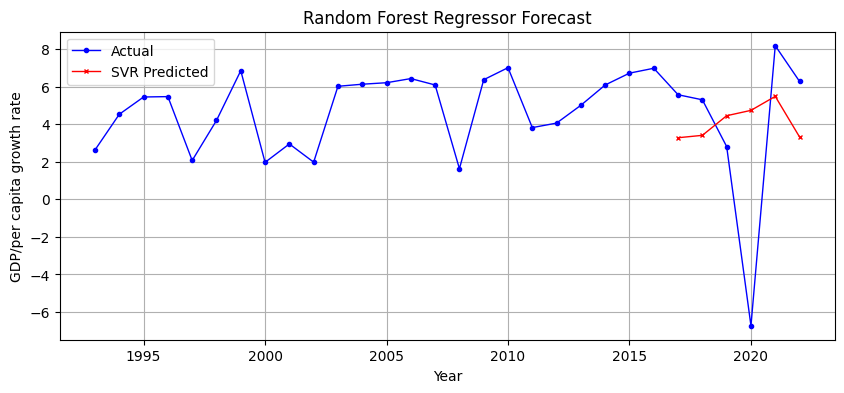

In [ ]:
## Plot the actual and predicted values
plt.figure(figsize=(10, 4))
plt.plot(gdp_data['year'], gdp_data['growth_rate'], label='Actual', linewidth=1, color='blue', marker='o', markersize=3)
plt.plot(test_data['year'], y_pred, label='SVR Predicted', color='red', linewidth=1, marker='x', markersize=3)
plt.xlabel('Year')
plt.ylabel('GDP/per capita growth rate')
plt.title('Random Forest Regressor Forecast')
plt.legend()
plt.grid(True)
plt.show()

# For LSTM, refer gdp_lstm colab file

In [ ]:
## https://colab.research.google.com/drive/1GRv99vQ2gs087MUMARUpA5OzTUZDfz-J?authuser=2#scrollTo=GBaYTYp6jgVJ

# XGBoost Regressor

In [ ]:
from xgboost import XGBRegressor

In [ ]:
## Split the data into training and testing sets
train, test = train_test_split(gdp_data, test_size=0.2, shuffle=False)

In [ ]:
train.head()

,yr,current_gdp,growth_rate,lag_1,lag_2,lag_3
year,,,,,,
1993-01-01,1993,301.50,2.63,3.32,-1.05,3.30
1994-01-01,1994,346.23,4.53,2.63,3.32,-1.05
1995-01-01,1995,373.63,5.45,4.53,2.63,3.32
1996-01-01,1996,399.58,5.47,5.45,4.53,2.63
1997-01-01,1997,414.90,2.07,5.47,5.45,4.53


In [ ]:
## Prepare the data for training and testing
X_train, y_train = train['yr'], train['growth_rate']
X_test, y_test = test['yr'], test['growth_rate']

In [ ]:
## Create an instance of the XGBRegressor class
model = XGBRegressor(objective='reg:squarederror', n_estimators=10) # reg:linear, n_estimators=10

# Train the model on the training data
model.fit(X_train.to_frame(), y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
## Make predictions on the test data
y_pred = model.predict(X_test.to_frame())

In [ ]:
## Calculate the mean squared error of the predictions
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"The root mean squared error of the predictions is {rmse:.2f}")

The root mean squared error of the predictions is 5.75


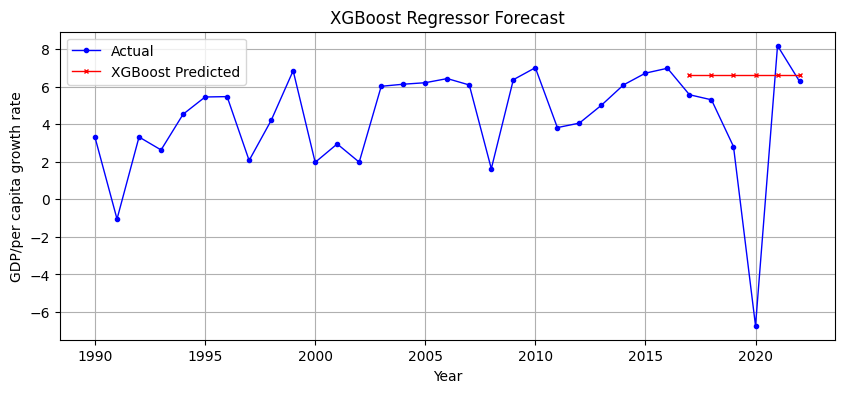

In [ ]:
## Plot the actual and predicted values
plt.figure(figsize=(10, 4))
plt.plot(gdp_data['yr'], gdp_data['growth_rate'], label='Actual', linewidth=1, color='blue', marker='o', markersize=3)
plt.plot(test['yr'], y_pred, label='XGBoost Predicted', color='red', linewidth=1, marker='x', markersize=3)
plt.xlabel('Year')
plt.ylabel('GDP/per capita growth rate')
plt.title('XGBoost Regressor Forecast')
plt.legend()
plt.grid(True)
plt.show()